In [1]:
# --- Importing Libraries -------------------------------------------------------
import pandas as pd
import numpy as np
import pickle
import dill
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import AutoMinorLocator
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split

# --- Matplotlib Settings -------------------------------------------------------
matplotlib.rc('figure', facecolor='k')
style.use('dark_background')

# --- Pandas Display Settings ---------------------------------------------------
pd.options.display.width = 113
pd.options.display.max_columns = 100
pd.options.display.colheader_justify='right'

# --- Importing Pickles ---------------------------------------------------------
def IMPORT_PICKLE(name):
    '''
    Returns pickled object within current file directory
    '''
    file_name = 'pickles/{}.pkl'.format(name)
    with open(file_name, 'rb') as my_file:
        return pickle.load(my_file)

# Dataset
X = IMPORT_PICKLE('minmax_dataset')
y = IMPORT_PICKLE('y')
feature_names = IMPORT_PICKLE('feature_names')

# Best classifier
model = IMPORT_PICKLE('best_model')

# Best classifier stats
stats = IMPORT_PICKLE('best_model_stats')
stats.reset_index(inplace=True)
stats.columns = ['description'] + stats.columns.tolist()[1:]

# Find thresholds function
with open('pickles/func_FIND_THRESHOLDS.pkl', 'rb') as myfile:
    FIND_THRESHOLDS = dill.load(myfile)
    
# --- Creating the Training and Hold-out Sets -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018)

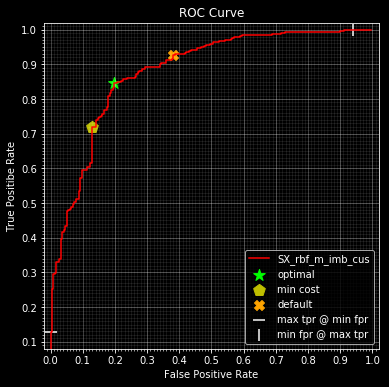

+ve range: -1.514 to 4.116 | 532
-ve range: -2.182 to 2.552 | 218

>>> Model parameters:
 - class_weight	None
 - C		575.861
 - gamma	0.00585997
 - kernel	rbf

>>> Interesting thresholds:
default             -0.00
optimal              0.50
min cost             0.99
max tpr @ min fpr    2.55
min fpr @ max tpr   -1.53
Name: thresholds, dtype: float64

>>> Performance:
           threshold       set  distance  cost  accuracy    tpr    fpr  FP   FN   TP   TN
0            default  training      0.39  -454      0.84   0.93   0.38  83   39  493  135
1            default  hold-out      0.54  -237      0.72   0.84   0.51  42   27  141   40
2            optimal  hold-out      0.39  -163      0.73   0.74   0.29  24   43  125   58
3           min cost  hold-out      0.46  -150      0.66   0.58    0.2  16   70   98   66
4  max tpr @ min fpr  hold-out       0.9  -157      0.39  0.095  0.012   1  152   16   81
5  min fpr @ max tpr  hold-out      0.89  -366       0.7   0.99   0.89  73    1  167    9


In [2]:
# --- Best Model Stats ----------------------------------------------------------

# Generating ROC curve (ROC) and harvesting interesting thresholds (IT)
IT, roc = FIND_THRESHOLDS('SX_rbf_m_imb_cus',
                           model, X_train, y_train, expt=True, show=True)

print '\n>>> Model parameters:'
params = model.get_params(False)
print ' - class_weight\t{}'.format(params['class_weight'])
print ' - C\t\t{:.6g}'.format(params['C'])
print ' - gamma\t{:.6g}'.format(params['gamma'])
print ' - kernel\t{}\n'.format(params['kernel'])

# Interesting thresholds
pd.options.display.float_format = '{:.2f}'.format
thresholds = IT['threshold']
thresholds.index = IT['description'].values
thresholds.name = 'thresholds'
print '>>> Interesting thresholds:\n{}\n'.format(thresholds)

# Performance metrics
print '>>> Performance:'
pd.options.display.float_format = '{:6.2g}'.format
training = IT.drop(['threshold'], axis=1)
training = training[['description', 'distance', 'cost', 'accuracy',
                      'tpr', 'fpr', 'FP', 'FN', 'TP', 'TN']]
training[['cost', 'FP', 'FN', 'TP', 'TN']] = training[['cost', 'FP', 'FN', 'TP',
                                                       'TN']].astype(np.int64)
training.drop([1,2,3,4], inplace=True)
performance = pd.concat([training, stats], axis=0, ignore_index=True)
performance['threshold'] = ['default'] + IT['description'].values.tolist()
performance['set'] = ['training'] + ['hold-out']*5
performance.drop(['description'], axis=1, inplace=True)
performance = performance[['threshold', 'set', 'distance', 'cost', 'accuracy',
                           'tpr', 'fpr', 'FP', 'FN', 'TP', 'TN']]
print performance